Цель: Провести exploratory data analysis (EDA) датасета по продажам, выявить ключевые паттерны, проблемы с данными (возвраты, outliers), построить визуализации и провести RFM-анализ для сегментации клиентов. На основе результатов предложить рекомендации по оптимизации бизнеса (снижение возвратов, удержание клиентов).

ТЗ:
1. Загрузить данные из CSV "data.csv" с обработкой кодировки ISO-8859-1.
2. Провести очистку: удалить отрицательные значения в Quantity и UnitPrice, пропуски в CustomerID (заменить на 'Unknown' или удалить), дубликаты и outliers по квантилям 0.95-0.99. Рассчитать дополнительные поля. Реализовать сквозные фильтры в sidebar. Добавить KPI в виде metric-карточек
3. Построить визуализации: барчарты, boxplot, heatmap корреляций.
4. Рассчитать RFM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

$$EDA-АНАЛИЗ$$

In [3]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="mixed", dayfirst=True)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")

In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,InvoiceYear
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-06-15 21:29:55.768514560,4.611114,15287.690570,17.987795,2010.921609
min,-80995.000000,2010-01-12 08:26:00,-11062.060000,12346.000000,-168469.600000,2010.000000
25%,1.000000,2011-03-23 10:25:00,1.250000,13953.000000,3.400000,2011.000000
50%,3.000000,2011-07-03 14:51:00,2.080000,15152.000000,9.750000,2011.000000
75%,10.000000,2011-10-05 10:18:00,4.130000,16791.000000,17.400000,2011.000000
max,80995.000000,2011-12-10 17:19:00,38970.000000,18287.000000,168469.600000,2011.000000
std,218.081158,NaN,96.759853,1713.600303,378.810824,0.268787


In [5]:
df[141:160]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceYear,InvoiceMonth
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,2010-01
142,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-01-12 09:45:00,0.85,16098.0,United Kingdom,10.20,2010,2010-01
143,536382,21912,VINTAGE SNAKES & LADDERS,8,2010-01-12 09:45:00,3.75,16098.0,United Kingdom,30.00,2010,2010-01
144,536382,21832,CHOCOLATE CALCULATOR,12,2010-01-12 09:45:00,1.65,16098.0,United Kingdom,19.80,2010,2010-01
145,536382,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-01-12 09:45:00,1.95,16098.0,United Kingdom,19.50,2010,2010-01
146,536382,22379,RECYCLING BAG RETROSPOT,10,2010-01-12 09:45:00,2.10,16098.0,United Kingdom,21.00,2010,2010-01
147,536382,22381,TOY TIDY PINK POLKADOT,50,2010-01-12 09:45:00,1.85,16098.0,United Kingdom,92.50,2010,2010-01
148,536382,22798,ANTIQUE GLASS DRESSING TABLE POT,8,2010-01-12 09:45:00,2.95,16098.0,United Kingdom,23.60,2010,2010-01
149,536382,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-01-12 09:45:00,3.75,16098.0,United Kingdom,15.00,2010,2010-01
150,536382,22926,IVORY GIANT GARDEN THERMOMETER,12,2010-01-12 09:45:00,5.95,16098.0,United Kingdom,71.40,2010,2010-01


Некоторые промежуточные выводы:
- Есть строки с отрицательными значениями в столбце Quantity, скорее всего, это возвраты, соответственно в этих же столбцах TotalPrice будет также иметь отрицательные значения
- Есть строки с пропущенными идентификаторами клиента, необходимо очистить датасет от пропущенных значений

Проверим выбросы:

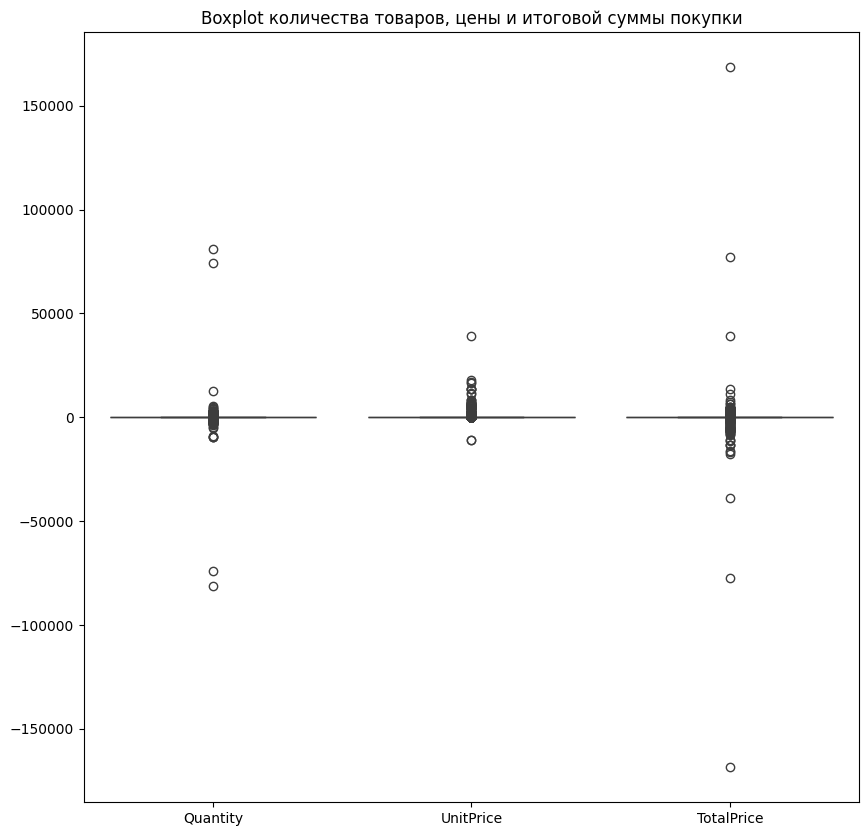

In [34]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df[['Quantity', 'UnitPrice', 'TotalPrice']], whis=1.5)
plt.title("Boxplot количества товаров, цены и итоговой суммы покупки")
plt.show()

На основе построенных boxplot-графиков видна значительная вариативность в данных. Распределения всех трех показателей демонстрируют существенную асимметрию с преобладанием экстремальных значений. Рассмотрим корреляцию между приведенными данными:

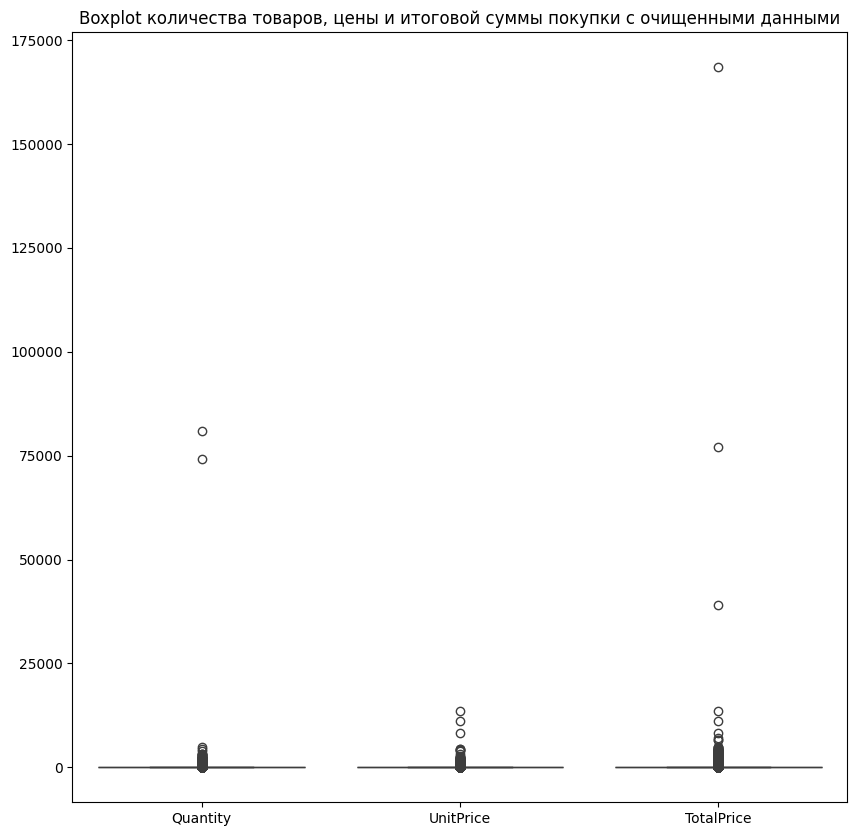

In [7]:
clean_df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

plt.figure(figsize=(10, 10))
sns.boxplot(data=clean_df[['Quantity', 'UnitPrice', 'TotalPrice']], whis=1.5)
plt.title("Boxplot количества товаров, цены и итоговой суммы покупки с очищенными данными")
plt.show()

Даже после чистки от возвратов остались положительные экстремы - слишком большие заказы. Скорее всего, это просто большие заказы, но они искажают средние/корреляции и визуализации. Очистим наш датасет от выбросов, NaN в CustomerID и дубликатов:

In [47]:
clean_df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()
clean_df['CustomerID'] = clean_df['CustomerID'].fillna('Unknown')
clean_df = clean_df.drop_duplicates()

def remove_outliers(series):
    Q1 = series.quantile(0.05)
    Q3 = series.quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series >= lower_bound) & (series <= upper_bound)

clean_df = clean_df[
    remove_outliers(clean_df['Quantity']) & 
    remove_outliers(clean_df['UnitPrice']) & 
    remove_outliers(clean_df['TotalPrice'])
]

In [48]:
clean_df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice,InvoiceYear
count,510005.000000,510005,510005.000000,510005.000000,510005.000000
mean,7.128452,2011-06-16 02:32:03.401966592,3.178114,13.671534,2010.921838
min,1.000000,2010-01-12 08:26:00,0.001000,0.001000,2010.000000
25%,1.000000,2011-03-23 10:25:00,1.250000,3.750000,2011.000000
50%,3.000000,2011-07-03 17:52:00,2.080000,9.780000,2011.000000
75%,10.000000,2011-10-05 12:11:00,4.130000,17.000000,2011.000000
max,73.000000,2011-12-10 17:19:00,23.530000,147.600000,2011.000000
std,9.467229,NaN,3.111200,16.250796,0.268427


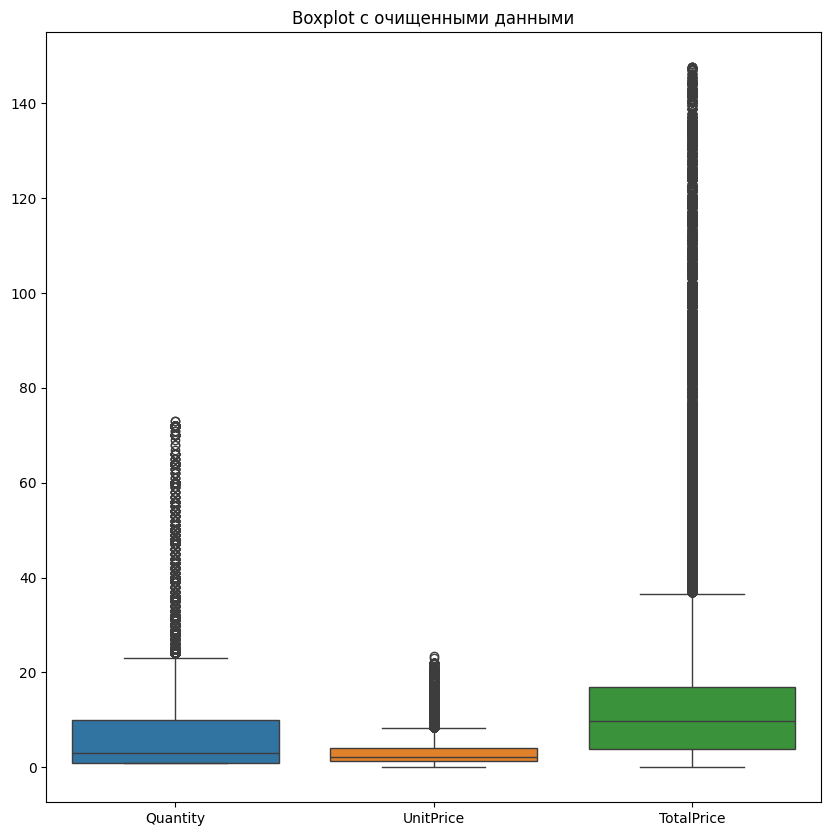

In [49]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=clean_df[['Quantity', 'UnitPrice', 'TotalPrice']], whis=1.5)
plt.title("Boxplot с очищенными данными")
plt.show()

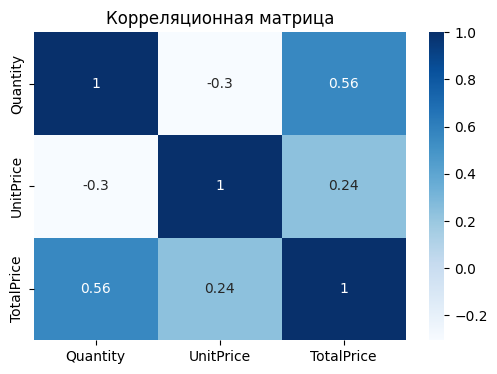

In [50]:
corr = clean_df[["Quantity", "UnitPrice", "TotalPrice"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Корреляционная матрица")
plt.show()

- Умеренно сильная положительная связь между Quantity и TotalPrice (0.56):
  Общая стоимость заказа в значительной степени зависит от количества товаров. Чем больше единиц в транзакции, тем выше TotalPrice. Это подтверждает, что Quantity — ключевой фактор дохода.
- Слабая положительная связь между UnitPrice и TotalPrice (0.24):
  Более дорогие товары часто ассоциируются с меньшими общими суммами заказов. Это может указывать на то, что клиенты покупают дорогие в малых количествах, в то время как дешёвые товары берут оптом, что повышает TotalPrice. 
- Умеренная отрицательная связь между Quantity и UnitPrice (-0.3):
  Более высокие цены обычно связаны с меньшими объемами покупок — возможно, дорогие товары заказывают в меньших количествах.

Проанализируем возвраты:

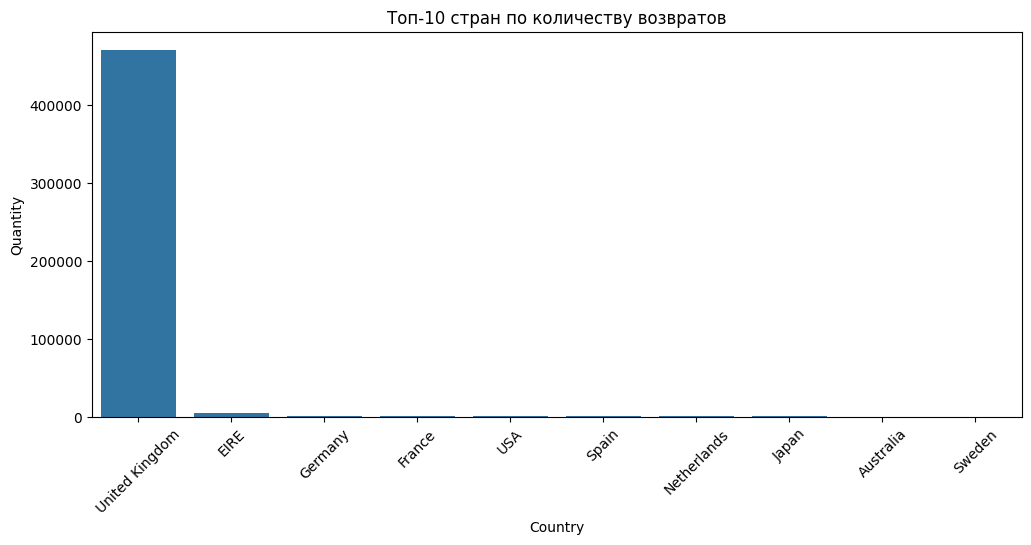

In [33]:
refunds = df[df['Quantity'] < 0].groupby("Country")["Quantity"].sum().abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=refunds.index, y=refunds.values)
plt.xticks(rotation=45)
plt.title("Топ-10 стран по количеству возвратов")
plt.ylabel("Quantity")
plt.xlabel("Country")

plt.show()

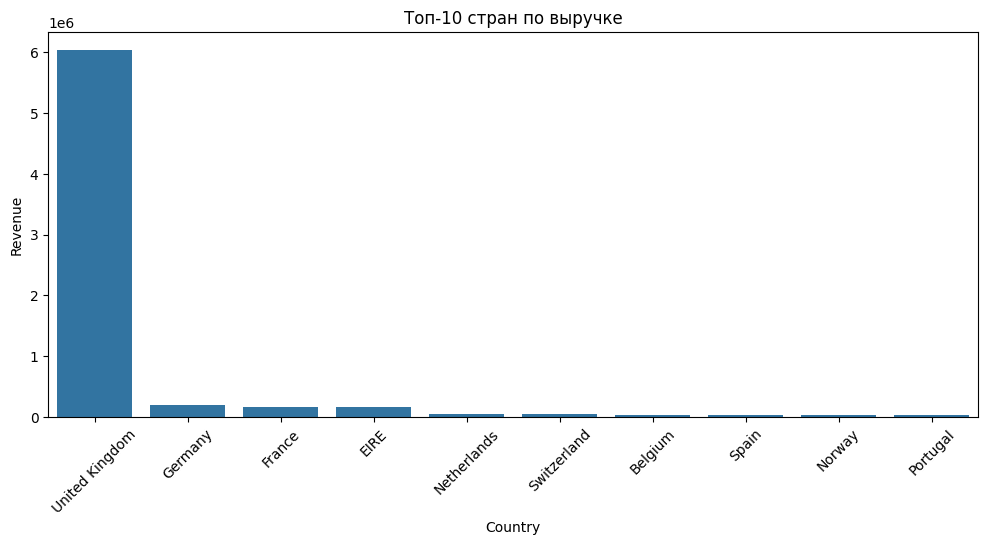

In [51]:
country_revenue = clean_df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=country_revenue.index, y=country_revenue.values)
plt.xticks(rotation=45)
plt.title("Топ-10 стран по выручке")
plt.ylabel("Revenue")
plt.show()

Промежуточные выводы:
- Большинство возвратов приходится на Великобританию, в связи с тем, что по продажам Великобритания первая.
- Остальные страны — минимальный вклад, возможно, из-за небольшого количества заказов.

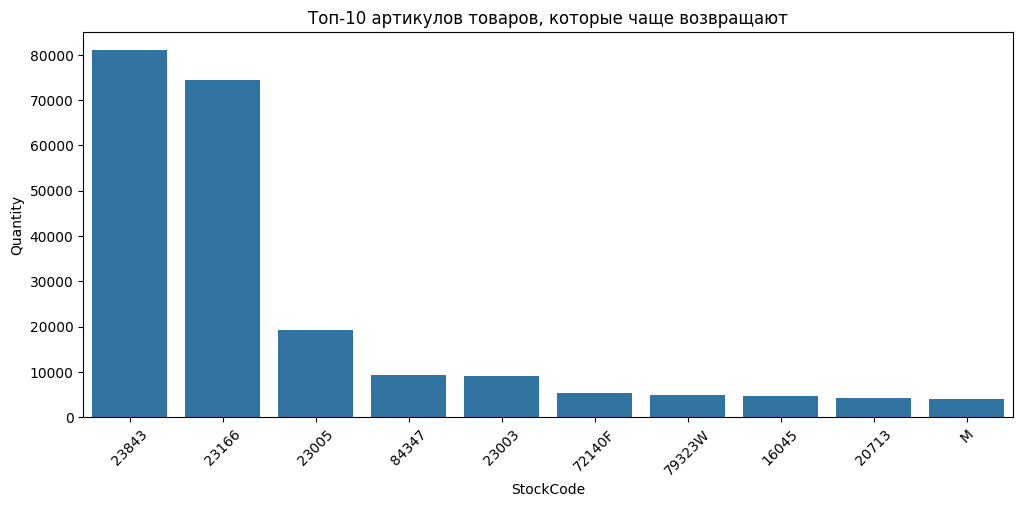

In [52]:
refunds_stockcode = df[df['Quantity'] < 0].groupby("StockCode")["Quantity"].sum().abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=refunds_stockcode.index, y=refunds_stockcode.values)
plt.xticks(rotation=45)
plt.title("Топ-10 артикулов товаров, которые чаще возвращают")
plt.ylabel("Quantity")
plt.show()

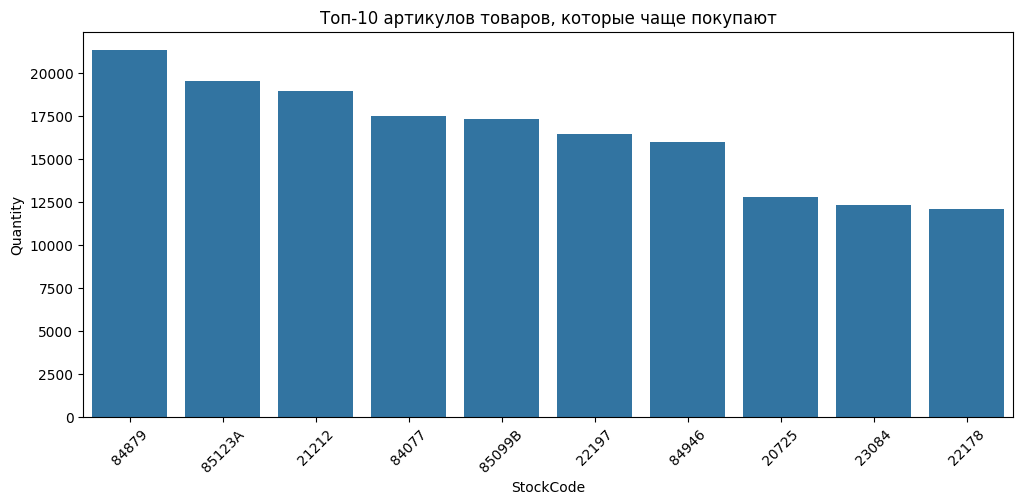

In [53]:
revenue_stockcode = clean_df.groupby("StockCode")["Quantity"].sum().abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=revenue_stockcode.index, y=revenue_stockcode.values)
plt.xticks(rotation=45)
plt.title("Топ-10 артикулов товаров, которые чаще покупают")
plt.ylabel("Quantity")
plt.show()

Как видно по вышеприведенным гистограммам, количество возвратов не зависит от количества проданных товаров. То есть, необязательно выполняется условие, что чем больше товаров этого артикула мы продадим, тем больше возвратов этого артикула будет.

Далее проанализируем продажи.

Продажи по месяцам:

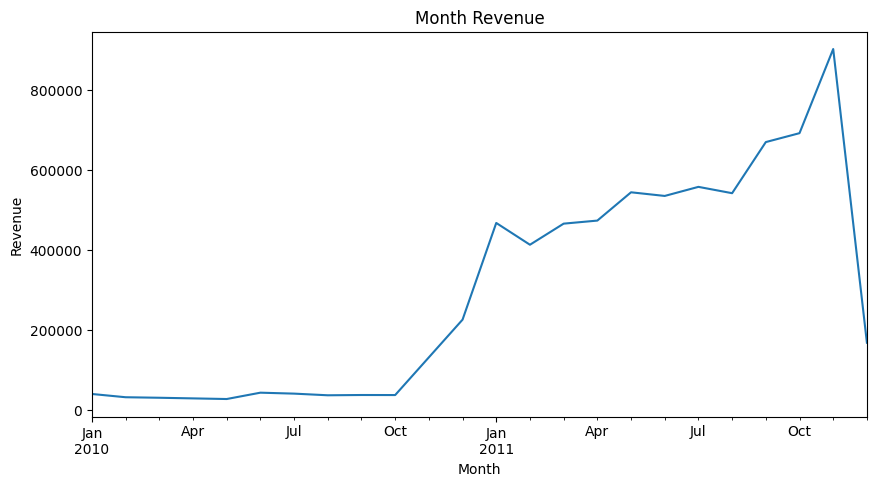

In [54]:
month = clean_df.groupby("InvoiceMonth")["TotalPrice"].sum()

month.plot(kind="line", figsize=(10, 5))
plt.title("Month Revenue")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

Видно, что продажи существенно снижены с декабря 2010 по декабрь 2011, далее в декабре 2012 также идет снижение, значит, наши продажи не зависят от сезонности, а идут как-то скачками

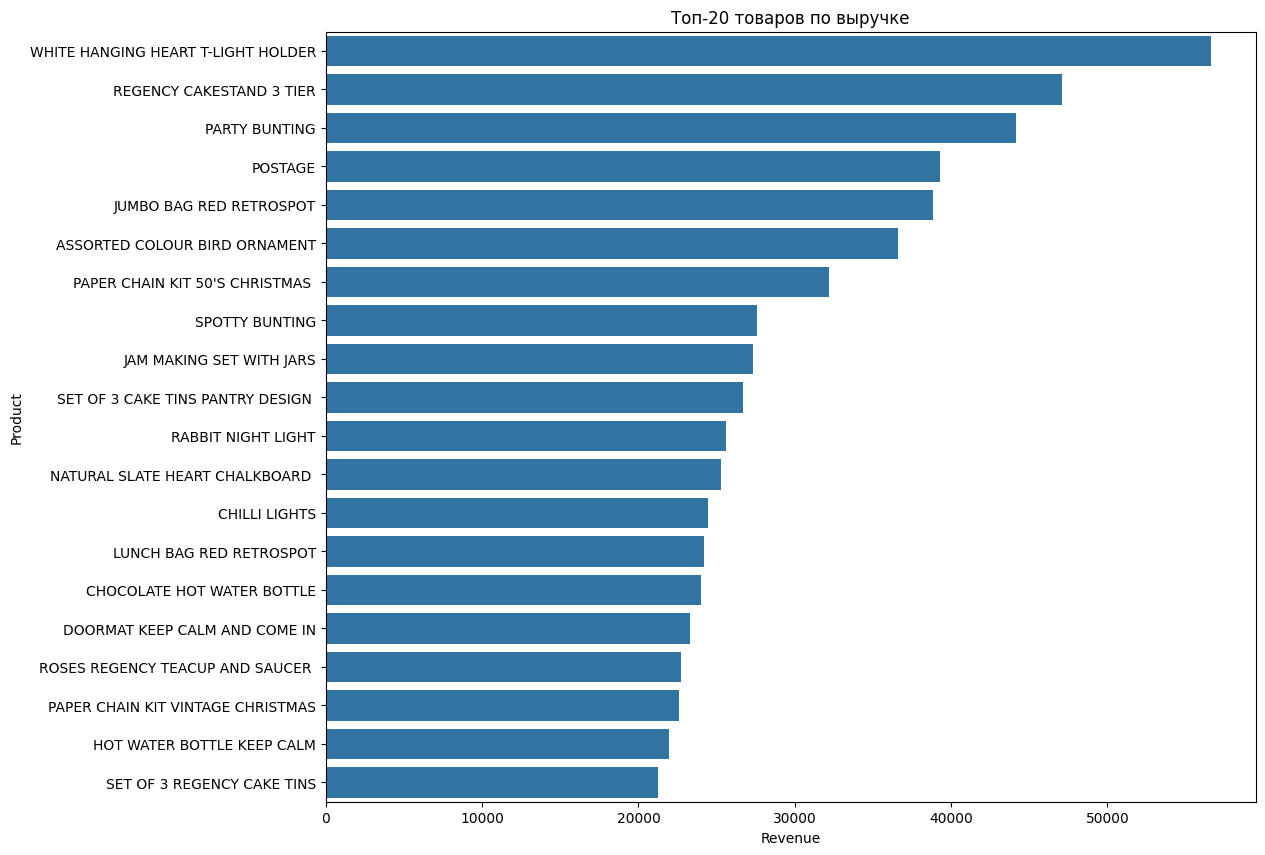

In [55]:
top_products = clean_df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,10))
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("Топ-20 товаров по выручке")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

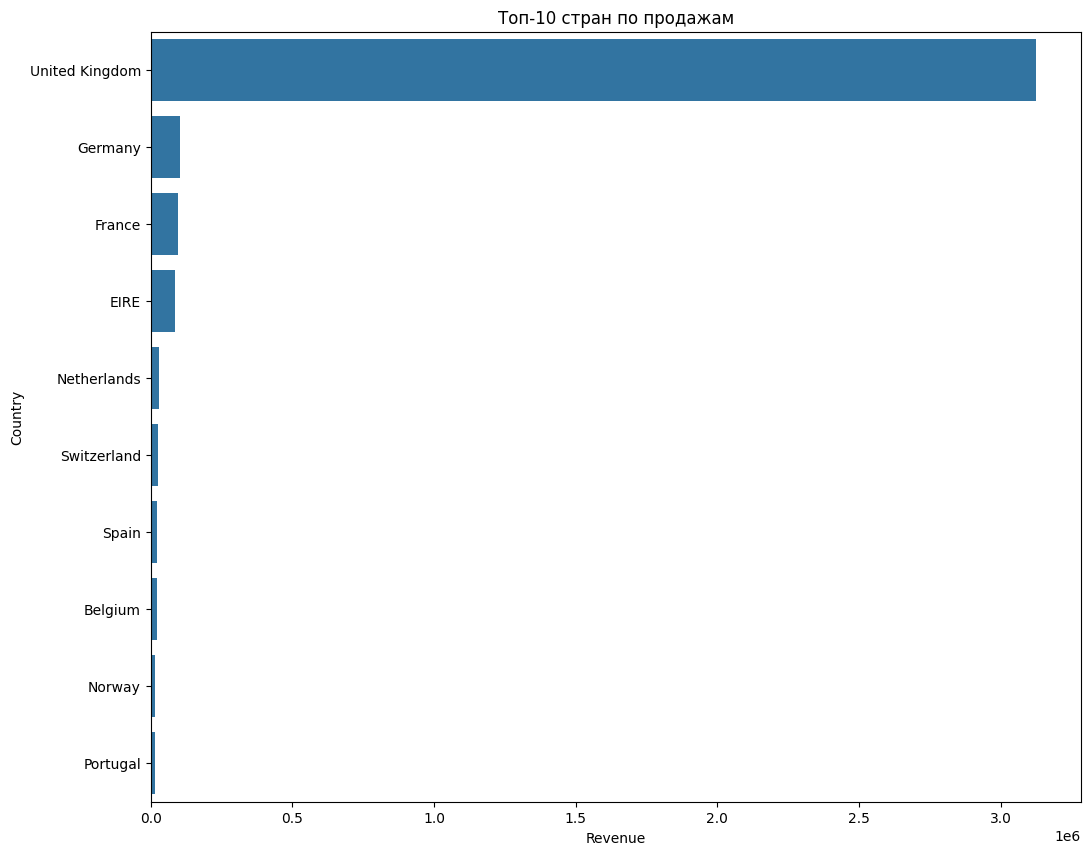

In [56]:
top_countries = clean_df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,10))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Топ-10 стран по продажам")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

Проверим, правда ли в стране-лидере по количеству покупок чаще всего покупают тот же товар, который является самым популярным вообще.
- H0: Самый популярный товар в стране-лидере по количеству покупок НЕ отличается по частоте покупок от других наиболее популярных товаров этой страны.
- H1: Самый популярный товар в стране-лидере встречается статистически значимо чаще, чем другие товары в этой стране.

In [57]:
from scipy.stats import chi2_contingency

top_country = clean_df['Country'].value_counts().idxmax()
top_product = clean_df.groupby("StockCode")["Quantity"].sum().idxmax()

a = clean_df[(clean_df['Country'] == top_country) & (clean_df['StockCode'] == top_product)].shape[0]
b = clean_df[(clean_df['Country'] == top_country) & (clean_df['StockCode'] != top_product)].shape[0]

c = clean_df[(clean_df['Country'] != top_country) & (clean_df['StockCode'] == top_product)].shape[0]
d = clean_df[(clean_df['Country'] != top_country) & (clean_df['StockCode'] != top_product)].shape[0]

table = [[a, b],
         [c, d]]

chi2, p, dof, expected = chi2_contingency(table)

print("\nТаблица частот:")
print(pd.DataFrame(table, 
                   index=[f"{top_country}", "Остальные страны"],
                   columns=["Топ-товар (по количеству покупок)", "Другие товары"]))

print("\nχ² =", chi2)
print("p-value =", p)

alpha = 0.05
if p < alpha:
    print("\nВывод: различие статистически значимо.")
    print(f"В стране {top_country} топ-товар покупают чаще, чем ожидалось случайно.")
else:
    print("\nВывод: статистически значимых отличий нет.")
    print(f"В стране {top_country} топ-товар НЕ покупают чаще обычного (разница может быть случайной).")


Таблица частот:
                  Топ-товар (по количеству покупок)  Другие товары
United Kingdom                                 1328         467257
Остальные страны                                 75          41345

χ² = 14.156546339514176
p-value = 0.00016821078277672513

Вывод: различие статистически значимо.
В стране United Kingdom топ-товар покупают чаще, чем ожидалось случайно.


Топ-товар: 84879


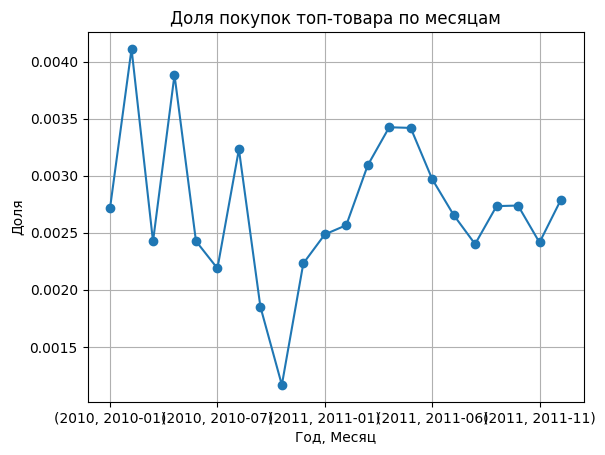

In [58]:
print("Топ-товар:", top_product)
clean_df['IsTop'] = (clean_df['StockCode'] == top_product).astype(int)

monthly_counts = clean_df.groupby(['InvoiceYear', 'InvoiceMonth'])['IsTop'].agg(['sum', 'count'])
monthly_counts['Share'] = monthly_counts['sum'] / monthly_counts['count']

monthly_counts['Share'].plot(kind='line', marker='o')
plt.title('Доля покупок топ-товара по месяцам')
plt.xlabel('Год, Месяц')
plt.ylabel('Доля')
plt.grid()
plt.show()

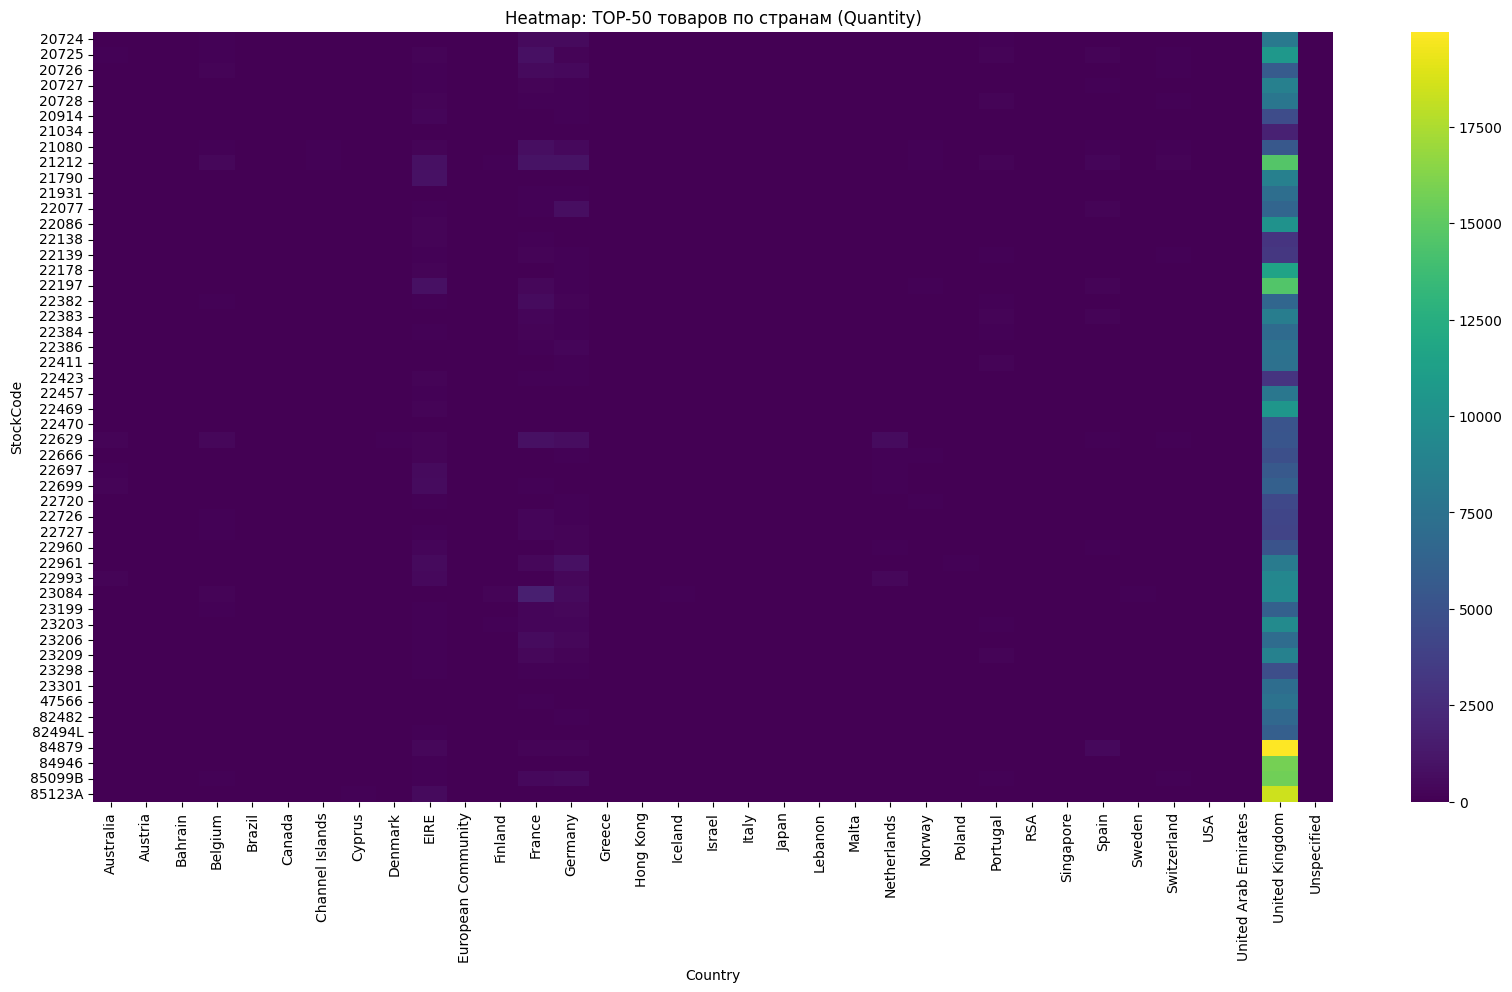

In [59]:
top50 = clean_df['StockCode'].value_counts().head(50).index

df_top50 = clean_df[clean_df['StockCode'].isin(top50)]

pivot_qty = df_top50.pivot_table(
    index='StockCode',
    columns='Country',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(20, 10))
sns.heatmap(pivot_qty, cmap='viridis')
plt.title("Heatmap: TOP-50 товаров по странам (Quantity)")
plt.xlabel("Country")
plt.ylabel("StockCode")
plt.show()


Рынки стран не одинаковые. Видно, что некоторые товары значительно «выбиваются» в Великобритании, потому что UK — крупнейший рынок. В UK есть товары, которые продаются хорошо только там, а не в других странах.

Эта матрица даёт «сырые данные» для нормировки: чтобы понять реальную структуру спроса, нужно убрать размер страны и построить кластеризацию стран на нормированной heatmap.

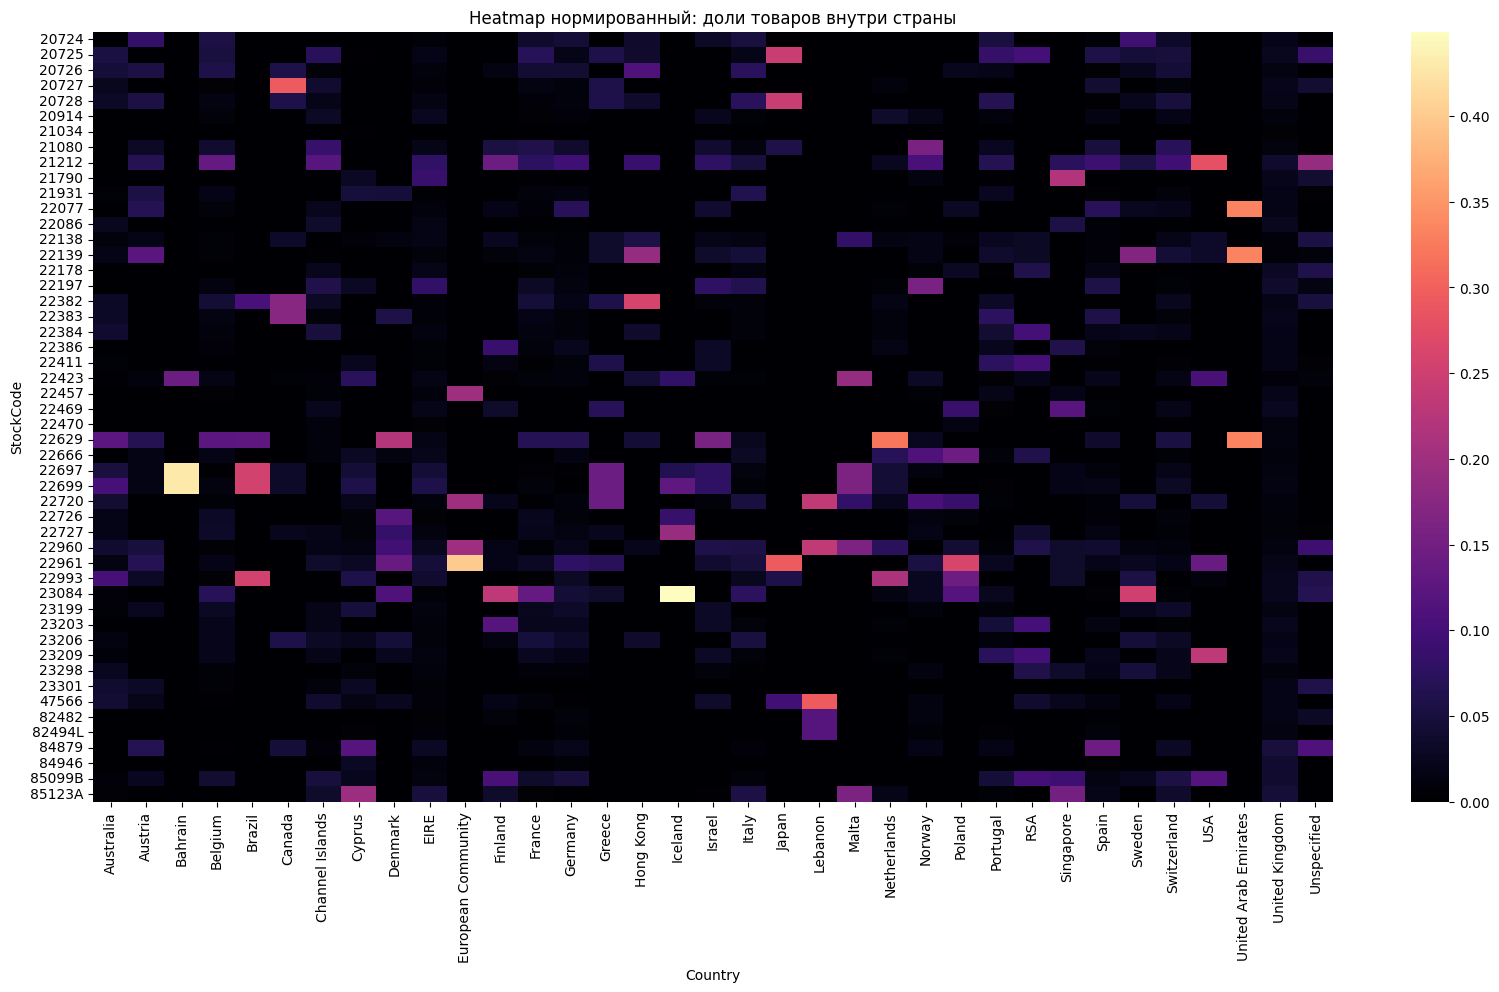

In [60]:
pivot_share = pivot_qty.div(pivot_qty.sum(axis=0), axis=1)

plt.figure(figsize=(20, 10))
sns.heatmap(pivot_share, cmap='magma')
plt.title("Heatmap нормированный: доли товаров внутри страны")
plt.xlabel("Country")
plt.ylabel("StockCode")
plt.show()


Теперь видно, какие товары на самом деле составляют ассортиментную долю внутри каждой страны.
Становится понятно, что: 
- Некоторые товары пропорционально более популярны в маленьких странах, чем в UK.
- Разные страны «специализируются» на разных категориях.

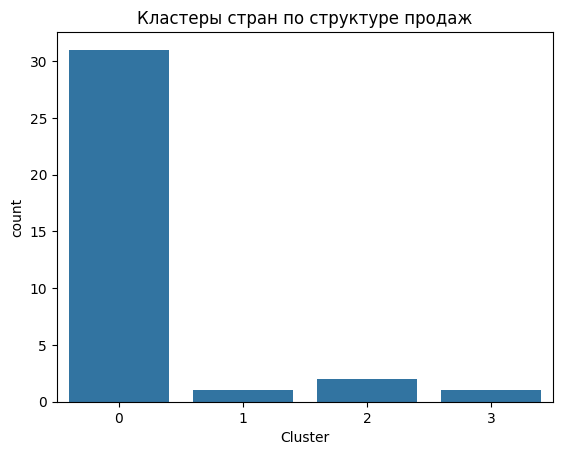

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = pivot_share.T 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

country_clusters = pd.DataFrame({
    'Country': X.index,
    'Cluster': clusters
})

sns.countplot(data=country_clusters, x='Cluster')
plt.title("Кластеры стран по структуре продаж")
plt.show()


Страны с похожим потребительским поведением попадают в один кластер.
Можно выделить:
- кластер стран, похожих на Великобританию (0);
- кластер стран, которые покупают много дешёвых массовых товаров (1);
- кластер стран, которые покупают подарочные/декоративные товары (2);
- кластер редких покупателей (3).

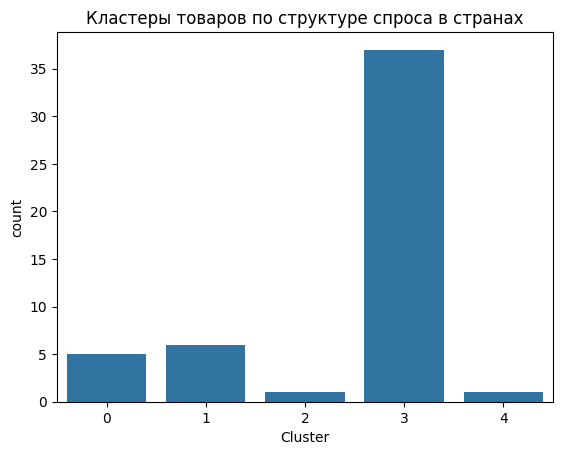

In [62]:
X_prod = pivot_share  # товары как объекты

X_prod_scaled = scaler.fit_transform(X_prod)

kmeans_prod = KMeans(n_clusters=5, random_state=42)
prod_clusters = kmeans_prod.fit_predict(X_prod_scaled)

product_clusters = pd.DataFrame({
    'StockCode': X_prod.index,
    'Cluster': prod_clusters
})

sns.countplot(data=product_clusters, x='Cluster')
plt.title("Кластеры товаров по структуре спроса в странах")
plt.show()


- Кластер 3 — товары с универсальным спросом (доминирующая группа с наибольшим количеством товаров).
Основу ассортимента можно фокусировать здесь, т.к. они формируют стабильные продажи по многим странам и охватывают большую часть продуктов.
- Кластеры 0, 1, 2 и 4 — товары со специфическими паттернами спроса (малые группы с нишевыми характеристиками).
  
Эти группы особенно полезны для:
 - локального маркетинга,
 - таргетированных закупок под страны,
- выявления уникальных товарных ниш,
 -планирования персонализированных стратегий продвижения.

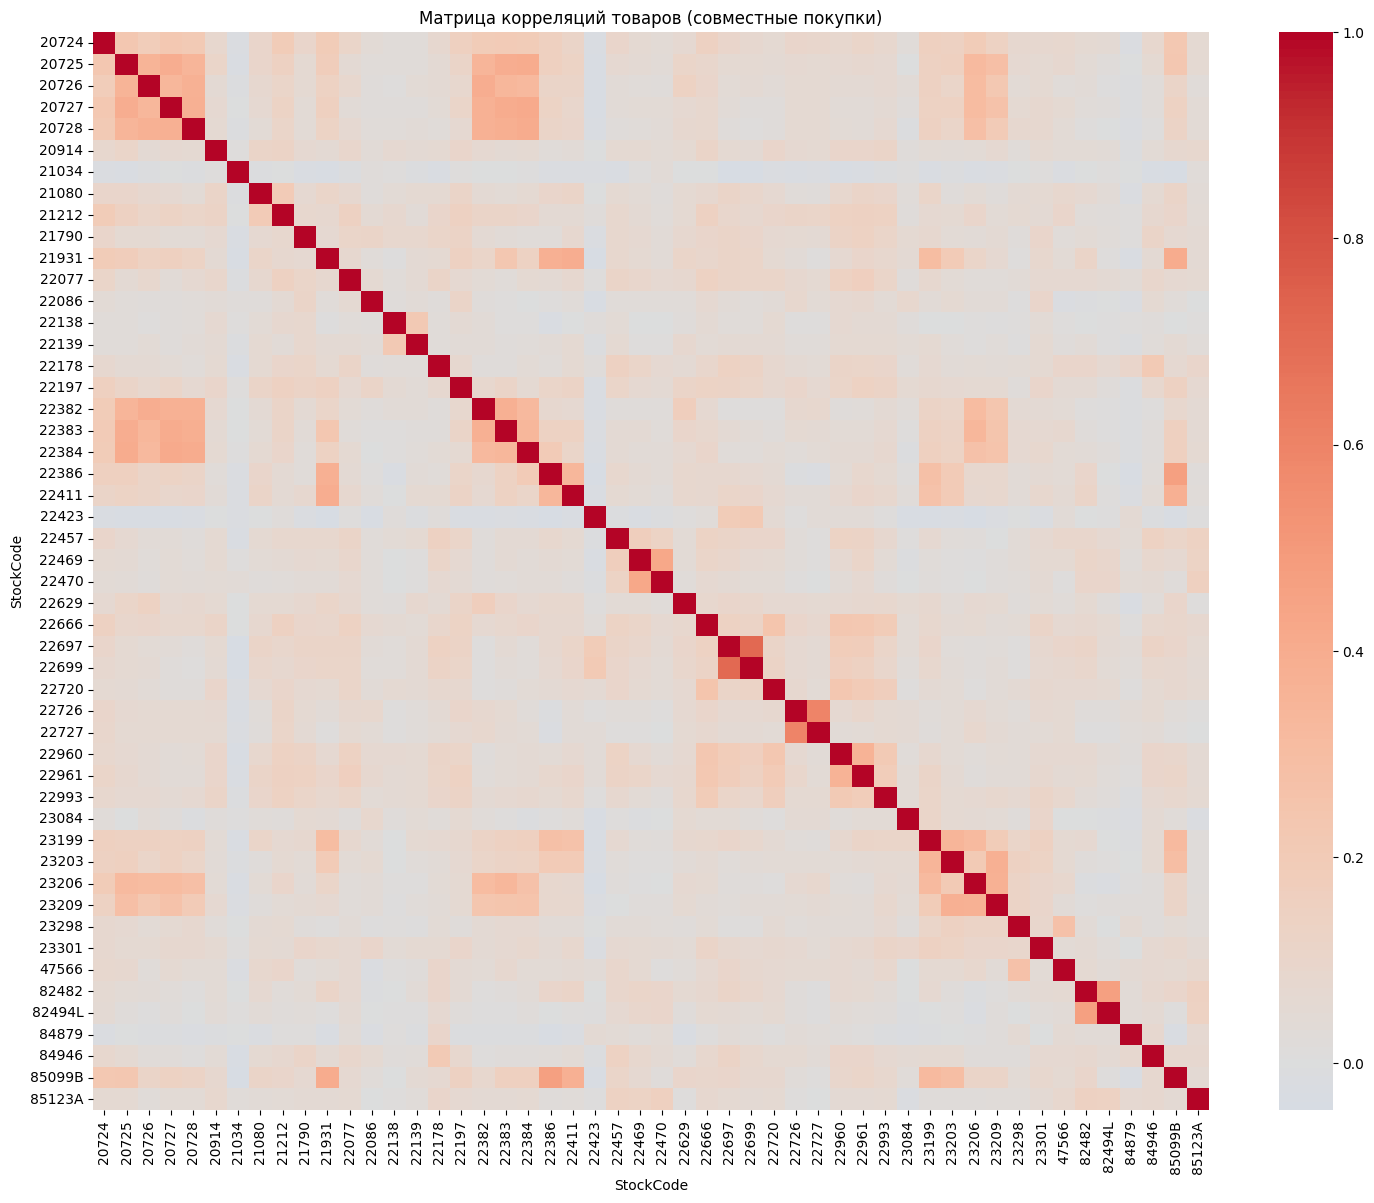

In [63]:
topN = 50
top_products = clean_df['StockCode'].value_counts().head(topN).index

df_top =clean_df[clean_df['StockCode'].isin(top_products)]

basket = df_top.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().fillna(0)

basket_binary = (basket > 0).astype(int)

corr_matrix = basket_binary.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Матрица корреляций товаров (совместные покупки)")
plt.show()


Большая часть ячеек имеет бледно-розовый или почти серый цвет, что соответствует слабой корреляции (0–0.2), это означает:
- большинство товаров покупаются независимо друг от друга;
- чётко выраженных «попарных» связей между товарами мало.

Местами видны более насыщенные пятна, это говорит о том, что:
- существуют кластеры товаров, которые часто покупают вместе;
- таких кластеров мало и их сила умеренная (0.3–0.5).

Отсутствуют большие тёмные красные блоки вне диагонали, следовательно:
- нет сильных товарных групп, которые формируют стабильные комплекты,
- спрос довольно «разреженный» — корзины покупателей разнообразны.

$$RFM и XYZ-АНАЛИЗЫ$$

In [64]:
max_date = clean_df['InvoiceDate'].max()

rfm = clean_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (max_date - x.max()).days,   # Recency
    "InvoiceNo": "nunique",                               # Frequency  
    "TotalPrice": "sum"                                   # Monetary
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm["R"] = pd.qcut(rfm["Recency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["F"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[4,3,2,1])
rfm["M"] = pd.qcut(rfm["Monetary"].rank(method="first"), 4, labels=[1,2,3,4])


rfm["R"] = rfm["R"].astype(int)
rfm["F"] = rfm["F"].astype(int) 
rfm["M"] = rfm["M"].astype(int)

def rfm_segment(row):
    r, f, m = row["R"], row["F"], row["M"]
    
    if r >= 4 and f >= 4 and m >= 4:
        return "Champions"
    elif r >= 3 and f >= 3 and m >= 3:
        return "Loyal Customers"
    elif r >= 3 and f >= 2:
        return "Potential Loyalists"
    elif r == 4 and f == 1:
        return "New Customers"
    elif r >= 3 and f == 1:
        return "Promising"
    elif r == 2 and f >= 2:
        return "Need Attention"
    elif r == 1 and f >= 2:
        return "At Risk"
    elif r == 1 and f == 1 and m >= 3:
        return "Cant Lose Them"
    elif r == 1 and f == 1:
        return "Hibernating"
    else:
        return "Other"

rfm["Segment"] = rfm.apply(rfm_segment, axis=1)

segment_counts = rfm["Segment"].value_counts()

product_rev = clean_df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False)

cumshare = product_rev.cumsum() / product_rev.sum()

def abc_class(x):
    if x <= 0.8:
        return "A"
    elif x <= 0.95:
        return "B"
    else:
        return "C"

abc = cumshare.apply(abc_class)
abc.name = "ABC"

monthly = clean_df.groupby(["Description", "InvoiceMonth"])["Quantity"].sum()

pivot = monthly.unstack(fill_value=0)

cv = pivot.std(axis=1) / pivot.mean(axis=1)
cv.name = "CV"

def xyz_class(v):
    if v <= 0.1:
        return "X"
    elif v <= 0.25:
        return "Y"
    else:
        return "Z"

xyz = cv.apply(xyz_class)
xyz.name = "XYZ"
abc_xyz = pd.concat([product_rev, abc, xyz], axis=1)
abc_xyz["Matrix"] = abc_xyz["ABC"] + abc_xyz["XYZ"]


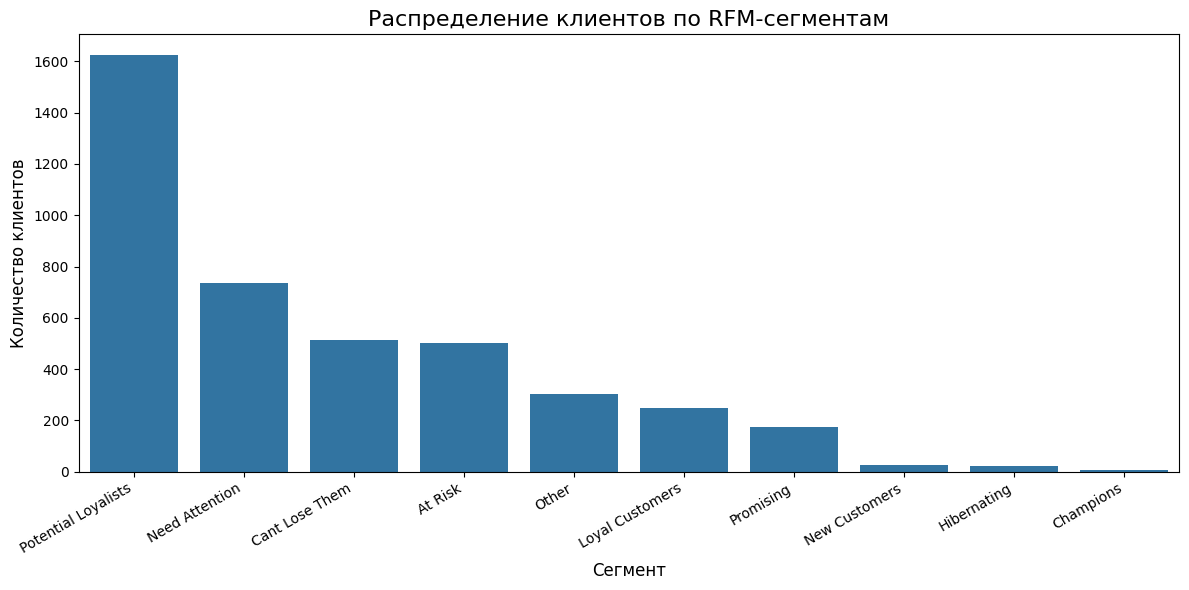

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=rfm, x="Segment", order=rfm["Segment"].value_counts().index)
plt.title("Распределение клиентов по RFM-сегментам", fontsize=16)
plt.xlabel("Сегмент", fontsize=12)
plt.ylabel("Количество клиентов", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


- Самые ценные клиенты (Champions и Loyal Customers) составляют небольшую часть базы.
Это указывает на то, что ядро высоколояльных клиентов мало, и его важно сохранить, но они не формируют основную массу покупателей. Фокус должен быть на увеличении этой группы.

- Самая крупная группа — Potential Loyalists.
Это клиенты с хорошей частотой и суммой покупок, которые уже проявляют интерес к бренду. Они являются ключевым сегментом для маркетинга — именно из них проще «вырастить» будущих лояльных покупателей.

- Заметные сегменты Need Attention, Can't Lose Them и At Risk требуют проработки стратегий удержания.
Это пользователи, активность которых уменьшается или становится нестабильной. Стоит разработать:
  - персональные офферы,
  - программы ре-активации,
  - триггерные email-кампании.


- Сегменты Hibernating и New Customers относительно небольшие.
Hibernating — это «спящие» клиенты, которых также можно попытаться вернуть некоторыми предложениями.
New Customers — небольшая группа, что может говорить о необходимости усилить каналы привлечения.

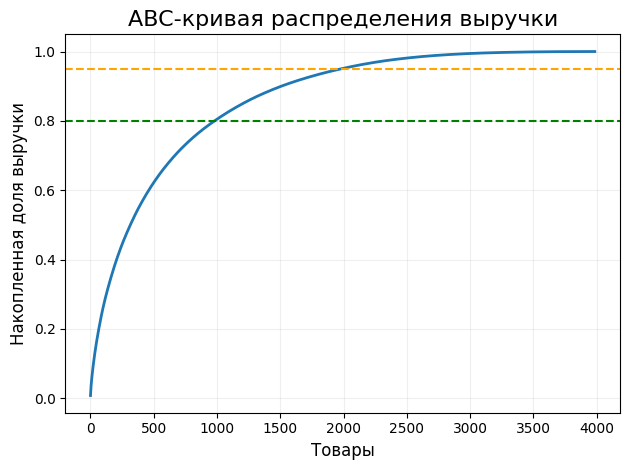

In [65]:
plt.plot(cumshare.values, linewidth=2)
plt.axhline(0.8, color="green", linestyle="--", linewidth=1.5)
plt.axhline(0.95, color="orange", linestyle="--", linewidth=1.5)

plt.title("ABC-кривая распределения выручки", fontsize=16)
plt.xlabel("Товары", fontsize=12) #товары отсортированы по прибыли
plt.ylabel("Накопленная доля выручки", fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


- Около 20% товаров дают ~80% выручки (зона A).

- Товары категории B занимают примерно 15% выручки — это средняя значимость.

- Товары категории C дают малую долю оборота, но составляют большинство ассортимента. Следовательно, ассортимент можно оптимизировать:

  - максимально контролировать и продвигать A-товары
   - товары B — развивать и анализировать
   - товары C — можно выводить или заменять

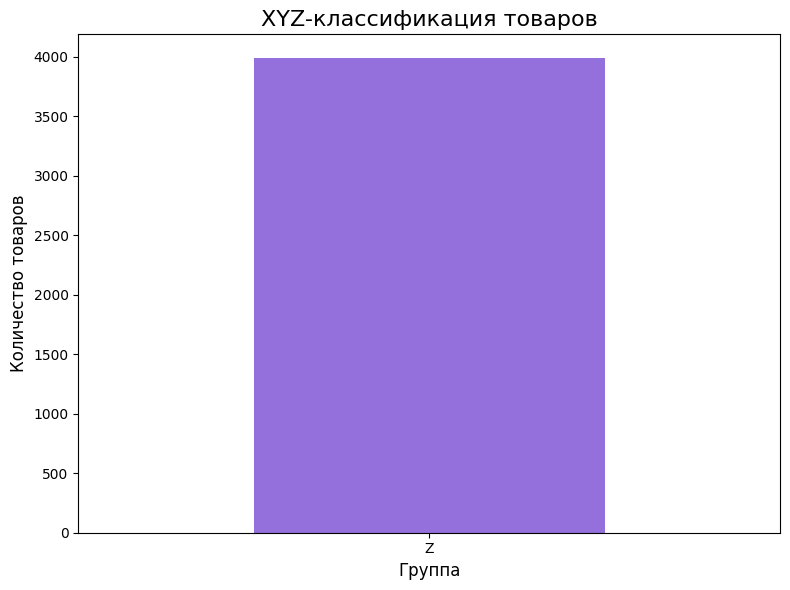

In [66]:
plt.figure(figsize=(8,6))
xyz.value_counts().plot(kind="bar", color="mediumpurple")

plt.title("XYZ-классификация товаров", fontsize=16)
plt.xlabel("Группа", fontsize=12)
plt.ylabel("Количество товаров", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Наличие большой группы Z указывает на риск "заморозки склада" и важность регулярного пересмотра ассортимента. 
Группа Z — товары с высоким разбросом спроса, хаотичными продажами или редкими покупками.

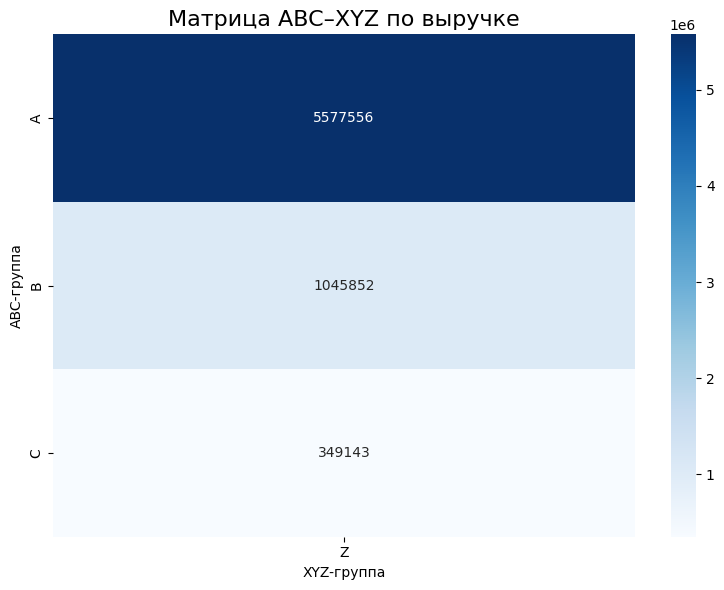

In [67]:
matrix_table = abc_xyz.pivot_table(
    index="ABC", columns="XYZ", values="TotalPrice", aggfunc="sum"
)

plt.figure(figsize=(8,6))
sns.heatmap(matrix_table, annot=True, fmt=".0f", cmap="Blues")

plt.title("Матрица ABC–XYZ по выручке", fontsize=16)
plt.xlabel("XYZ-группа")
plt.ylabel("ABC-группа")
plt.tight_layout()
plt.show()

AZ — товары с высокой выручкой, но нестабильным спросом.
Такие товары требуют:
- более точного прогнозирования,
- динамических моделей пополнения,
- усиленного контроля остатков.

BZ — товары средней важности по выручке, но также нестабильные.
Здесь важно применять аккуратную политику закупок и отслеживать сезонность или акции, влияющие на колебания спроса.

CZ — товары с низкой выручкой и нестабильным спросом.
Они могут быть:
- кандидатами на сокращение ассортимента,
- исключением из постоянного стока.
Держать их на складе рискованно из-за вероятности неликвидов.

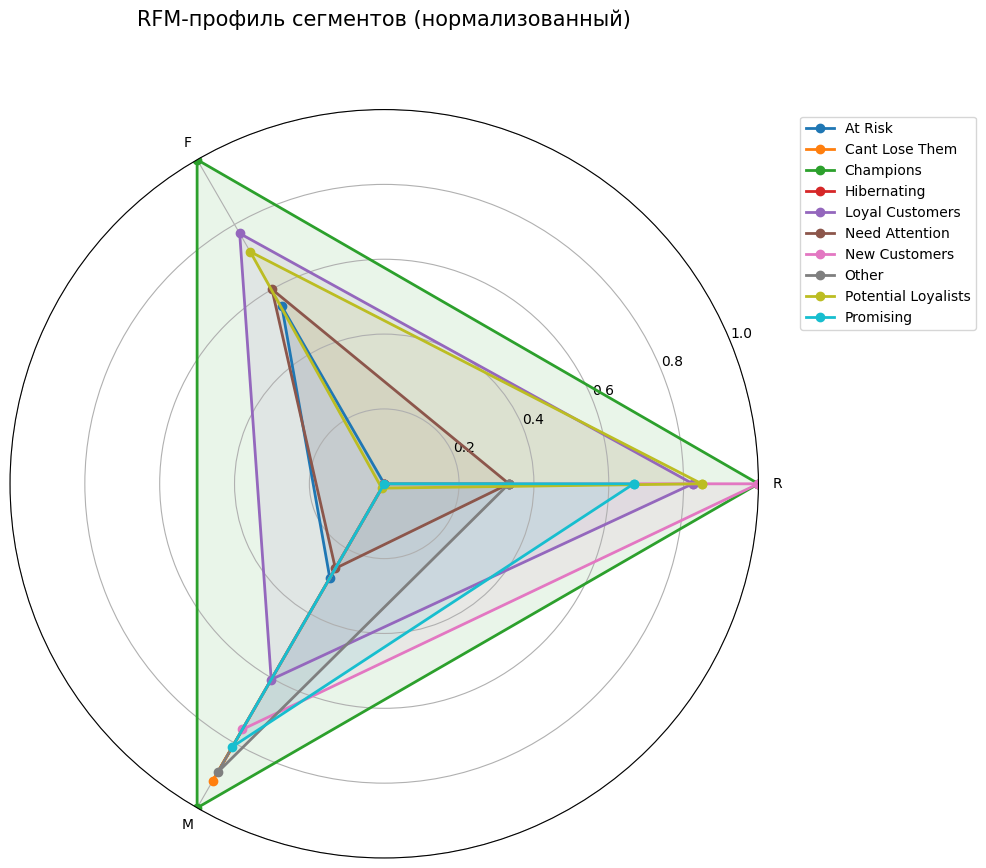

In [68]:
polar_data = rfm.groupby('Segment')[['R', 'F', 'M']].mean()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
polar_data_normalized = pd.DataFrame(
    scaler.fit_transform(polar_data),
    columns=polar_data.columns,
    index=polar_data.index
)

segments = polar_data_normalized.index
categories = ['R', 'F', 'M']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Замыкаем круг

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for i, segment in enumerate(segments):
    values = polar_data_normalized.loc[segment].values.tolist()
    values += values[:1]  # Замыкаем линию
    ax.plot(angles, values, linewidth=2, label=segment, marker='o')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0, 1)
ax.set_title('RFM-профиль сегментов (нормализованный)', size=15, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

В итоге получили:
- Лучшие клиенты (Champions)

Высокие показатели по всем осям (R, F, M близки к 1)

Это самые ценные клиенты - покупают часто, недавно и на большие суммы

- Лояльные клиенты (Loyal Customers)

Высокие Frequency и Monetary, хороший Recency

Регулярно покупают и приносят стабильный доход

- Перспективные (Potential Loyalists)
  
Хорошие показатели по 2 из 3 метрик

Могут стать лояльными клиентами, если их стимулировать к более частым покупкам

- Требующие внимания (Need Attention)

Средние показатели, но есть риск снижения активности

- Группы риска:

At Risk - были активны, но давно не покупали

- Can't Lose Them - приносят высокий доход, но могут уйти, если не принять срочные меры по удержанию

- Неактивные:
Hibernating - давно не покупали и покупали редко

Общий вывод по проделанной работе

В ходе нашего взаимодействия был проведен полный цикл анализа датасета по продажам, начиная от визуализации сырых данных, очистки, EDA (exploratory data analysis) и заканчивая RFM-сегментацией клиентов. Работа была структурирована поэтапно: от выявления проблем (возвраты, outliers) до извлечения бизнес-инсайтов и рекомендаций. 
1. Анализ сырых данных и визуализации (гистограммы, boxplot, корреляции)

Выводы:
Гистограммы показали доминирование нескольких товаров в возвратам (23843 и 23166 — >70% volume, с "длинным хвостом"), но равномерное распределение в покупках. Пересечение минимально, что указывает на специфические проблемы качества/логистики для отдельных позиций.


Boxplot (сырые): Сжатый IQR (0), множество outliers (-150k до +150k) из-за возвратов и оптовых заказов. После фильтра на positives и quantile(0.95): IQR расширился (Quantity 1-10), но хвосты остались — типичная асимметрия для розницы (80% малых транзакций).

Корреляции: Сильная между Quantity и TotalPrice (0.56 - объём отвечает за доход), слабая отрицательная с UnitPrice (0,24 - дорогие товары покупают мало), отрицательная между Quantity и UnitPrice (-0,3 - дорогие товары заказывают в меньших количествах).

Бизнес-импликации: Данные "грязные" изначально (5-10% возвратов снижают прибыль), но после очистки раскрывают: низкий средний чек (~13.7£), фокус на volume, не на премиум. Возвраты — ключевой убыток.

2. Очистка данных

Выводы: 
Исходно ~541909 строк; после — ~510005 (удалено ~5-6%). Min>0, max разумные (Quantity≤73, UnitPrice≤23.53). 

Очистка удалила шум (negatives занижали доход). Без очистки выводы были бы искажёнными (e.g., corr занижена).

3. RFM-анализ и сегментация клиентов

Выводы: ~4200 клиентов. 

Champions и Loyal Customers: ~50%.

Loyal: Стабильны.

Potential: Рост-потенциал (~20%). 
At Risk/Hibernating: ~20%, низкий Recency. 

Бизнес-импликации: 20% клиентов — 80% дохода. Сегментация выявляет группы для развития стратегии маркетинга (например, предложение скидок для At Risk). 

Связь с EDA: Лояльные покупают топ-товары, но возвраты выше у Hibernating.
